In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [3]:
# split iris data in taring and test data
# A random permuatation, to split the data randomly 

#np.random.seed(0) just to get same randoms every time
np.random.seed(0)

# shuffle vs permutation
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [4]:
# create and fit a k-nearest-neighbor classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
def getPredictionForK(neighbours):
    knn = KNeighborsClassifier(neighbours)
    knn.fit(iris_X_train, iris_y_train)
    return knn.predict(iris_X_test)

In [5]:
# Write error of the classifier
# I could have use "accuracy_score" function to estimate the error rate since I would have return 1- "accuracy_score"
# but from what I understand from assaignment, you want us to implement our own function error functiion.
def my_error_rate(output, prediction):
    true_no = 0
    for a,b in zip(output,prediction):
       if (a == b):
            true_no +=1
    return 1 - (true_no / len(output))

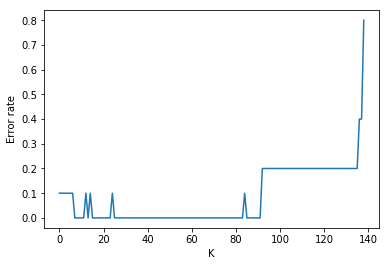

Optimal K is =  7


In [6]:
# What is the optimal parameter k of the k-nearest-neighbor classifier for this dataset?
import matplotlib.pyplot as plt


def runKnn_and_calculate_error(neighbours_number):
    # train for neighbours_number and return prediction.
    y_test_prediction = getPredictionForK(neighbours_number)
    # return error rate
    return my_error_rate(iris_y_test,y_test_prediction)

errors = []
for i in range (1,140):
    errors.append(runKnn_and_calculate_error(i))
plt.plot(errors)
plt.ylabel('Error rate')
plt.xlabel('K')
plt.show()

# As we can see all possible K's has been investegated, and there are many optimal K parameters that satisfies 0 error rate.
x = min(float(s) for s in errors)

print ("Optimal K is = ",errors.index(x))

In [7]:
# Svm classifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

standardize = StandardScaler()

# Compute the mean and std to be used for later scaling.
standardize.fit(iris_X_train)

# Fit to data, then transform it. 
# Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_train_std = standardize.transform(iris_X_train)
X_test_std = standardize.transform(iris_X_test)

# gamma parameter defines how far the influence of a single training example reaches, 
# with low values meaning ‘far’ and high values meaning ‘close’. 

# The C parameter trades off misclassification of training examples against simplicity of the decision surface.
# A low C makes the decision surface smooth, while a high C aims at 
# classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

svm_clf = SVC()
# Use cross-validation to evaluate the classifiers.

scores = cross_val_score(svm_clf, iris_X, iris_y, cv=10)
print("Accuracy of the svm classifier with cross validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


svm_clf.fit(X_train_std, iris_y_train)
print('The accuracy of the svm classifier on training data without cross validation is ',svm_clf.score(X_train_std, iris_y_train))

print('The accuracy of the svm classifier on test data without cross validation is  ',svm_clf.score(X_test_std, iris_y_test))

# scaling the input data gives a better score

#clf = SVC()
#clf.fit(iris_X_train, iris_y_train)
#print('The accuracy of the svm classifier on training data is ',clf.score(iris_X_train, iris_y_train))
#print('The accuracy of the svm classifier on test data is ',clf.score(iris_X_test, iris_y_test))

Accuracy of the svm classifier with cross validation: 0.98 (+/- 0.06)
The accuracy of the svm classifier on training data without cross validation is  0.971428571429
The accuracy of the svm classifier on test data without cross validation is   1.0


In [8]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

scores = cross_val_score(xgb_clf, iris_X, iris_y, cv=10)
print("Accuracy of the xgb classifier with cross validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


xgb_clf = xgb_clf.fit(X_train_std, iris_y_train)
print('The accuracy of the xgb classifier on training data without cross validation is',xgb_clf.score(X_train_std, iris_y_train))
print('The accuracy of the xgb classifier on test data without cross validation is',xgb_clf.score(X_test_std, iris_y_test))

/home/mert/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy of the xgb classifier with cross validation: 0.96 (+/- 0.07)
The accuracy of the xgb classifier on training data without cross validation is 1.0
The accuracy of the xgb classifier on test data without cross validation is 0.9


In [9]:
# optimal k was 7
knn_clf = KNeighborsClassifier(7)

scores = cross_val_score(knn_clf, iris_X, iris_y, cv=10)
print("Accuracy of the knn classifier with cross validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of the knn classifier with cross validation: 0.97 (+/- 0.09)


In [10]:
# Compare evaluation results of the three classifiers

# Result of Cross-validation with 10 folds

# For knn classifier with k = 7, accuracy on test data was 0.97 (+/- 0.09)
# For Svm classifier, accuracy on test data was 0.98 (+/- 0.06)
# For Xgb classifier, accuracy on test data was 0.96 (+/- 0.07)

# So by comparing accuracy, we can say that svm algorithm gave better result for this dataset.